In [37]:
from db_utils import DataFrameInfo
from db_utils import DataFrameTransform
from db_utils import DataTransform
from db_utils import Plotter
from db_utils import RDSDatabaseConnector
import pandas as pd

In [38]:
my_frame_info = DataFrameInfo()
my_dataframe_transformer = DataFrameTransform()
my_transformer = DataTransform()
my_plotter = Plotter()
my_extractor = RDSDatabaseConnector(my_transformer.read_db_creds("db_creds.yaml"))


In [39]:
my_extractor.rds_table_to_csv('failure_data')
df = my_transformer.read_csv_as_dataframe('csv_of_dataframe.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   UDI                      10000 non-null  int64  
 2   Product ID               10000 non-null  object 
 3   Type                     10000 non-null  object 
 4   Air temperature [K]      9162 non-null   float64
 5   Process temperature [K]  9119 non-null   float64
 6   Rotational speed [rpm]   10000 non-null  int64  
 7   Torque [Nm]              10000 non-null  float64
 8   Tool wear [min]          9516 non-null   float64
 9   Machine failure          10000 non-null  int64  
 10  TWF                      10000 non-null  int64  
 11  HDF                      10000 non-null  int64  
 12  PWF                      10000 non-null  int64  
 13  OSF                      10000 non-null  int64  
 14  RNF                    

In [40]:
def transform_data_boolean(dataframe, list_of_columns):
    for column_name in list_of_columns:
        dataframe = my_transformer.boolean_convert(dataframe, column_name)
    

transform_data_boolean(df, ['Machine failure', 'TWF','HDF','PWF','OSF','RNF'])

df['Type'] = my_transformer.string_convert(df, 'Type', ['L', 'M', 'H'])

df.head()

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,3416,L50595,0,301.4,310.4,1579,36.9,133.0,False,False,False,False,False,False
1,1,7130,L54309,0,300.6,310.0,1635,31.0,107.0,False,False,False,False,False,False
2,2,2320,M17179,1,299.2,308.8,1700,33.5,185.0,False,False,False,False,False,False
3,3,9601,M24460,1,298.9,310.0,1561,45.3,58.0,False,False,False,False,False,False
4,4,614,L47793,0,298.1,309.9,1634,30.0,53.0,False,False,False,False,False,False


In [41]:
def show_null_information(data_frame, list_of_columns): 
    for column in list_of_columns:
        my_frame_info.null_value_information(data_frame[column])

show_null_information(df, df.columns.values[2:])


Null value information for Product ID: 
Percentage of non-null values: 100.0 %

Null value information for Type: 
Percentage of non-null values: 100.0 %
NormaltestResult(statistic=1200.2628547171475, pvalue=2.3239815797758362e-261)

Null value information for Air temperature [K]: 
Percentage of non-null values: 91.62 %
NormaltestResult(statistic=928.1812219102641, pvalue=2.805488927993442e-202)

Null value information for Process temperature [K]: 
Percentage of non-null values: 91.19 %
NormaltestResult(statistic=181.21832473316812, pvalue=4.455954774292699e-40)

Null value information for Rotational speed [rpm]: 
Percentage of non-null values: 100.0 %
NormaltestResult(statistic=4395.347068975414, pvalue=0.0)

Null value information for Torque [Nm]: 
Percentage of non-null values: 100.0 %
NormaltestResult(statistic=0.21260705444450384, pvalue=0.8991516896381224)

Null value information for Tool wear [min]: 
Percentage of non-null values: 95.16 %
NormaltestResult(statistic=6306.89581536

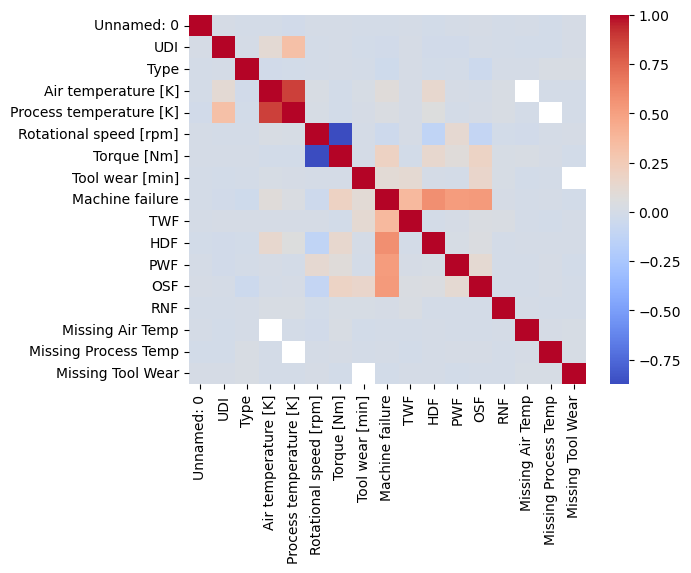

In [42]:
df['Missing Air Temp'] = df['Air temperature [K]'].isnull()

df['Missing Process Temp'] = df['Process temperature [K]'].isnull()

df['Missing Tool Wear'] = df['Tool wear [min]'].isnull()

my_plotter.show_correlation_plot(df)

We see that all the missing value columns have no correlation to anything, so we should be able to simpkly impute the mean for all those columns.

In [43]:
def impute_median_of_all_columns(dataframe, list_of_columns):
    for column in list_of_columns:
        dataframe[column] = my_dataframe_transformer.impute_median(dataframe[column])

impute_median_of_all_columns(df, ['Air temperature [K]','Process temperature [K]', 'Tool wear [min]'])

show_null_information(df, df.columns.values[2:])


Null value information for Product ID: 
Percentage of non-null values: 100.0 %

Null value information for Type: 
Percentage of non-null values: 100.0 %
NormaltestResult(statistic=1200.2628547171475, pvalue=2.3239815797758362e-261)

Null value information for Air temperature [K]: 
Percentage of non-null values: 100.0 %
NormaltestResult(statistic=409.6297543519786, pvalue=1.1220934590648656e-89)

Null value information for Process temperature [K]: 
Percentage of non-null values: 100.0 %
NormaltestResult(statistic=40.05941215174193, pvalue=2.0008253312770975e-09)

Null value information for Rotational speed [rpm]: 
Percentage of non-null values: 100.0 %
NormaltestResult(statistic=4395.347068975414, pvalue=0.0)

Null value information for Torque [Nm]: 
Percentage of non-null values: 100.0 %
NormaltestResult(statistic=0.21260705444450384, pvalue=0.8991516896381224)

Null value information for Tool wear [min]: 
Percentage of non-null values: 100.0 %
NormaltestResult(statistic=3498.20678940

In [44]:
my_frame_info.show_statistical_values([df[column] for column in df.columns[3:]])


Statistical values for Type:
Mean:0.5003
Median:0.0
Mode:0    0
Name: Type, dtype: int64
Standard deviation: 0.6713009567231782
Skew: 0.9938557437473519

Statistical values for Air temperature [K]:
Mean:300.01624999999996
Median:300.1
Mode:0    300.1
Name: Air temperature [K], dtype: float64
Standard deviation: 1.9137097914826555
Skew: 0.1118076946528201

Statistical values for Process temperature [K]:
Mean:310.01937000000004
Median:310.1
Mode:0    310.1
Name: Process temperature [K], dtype: float64
Standard deviation: 1.4136504673590025
Skew: -0.009679130151231216

Statistical values for Rotational speed [rpm]:
Mean:1538.7761
Median:1503.0
Mode:0    1452
Name: Rotational speed [rpm], dtype: int64
Standard deviation: 179.2840959134263
Skew: 1.993171004713752

Statistical values for Torque [Nm]:
Mean:39.986909999999995
Median:40.1
Mode:0    40.2
Name: Torque [Nm], dtype: float64
Standard deviation: 9.968933725121389
Skew: -0.009516595840058564

Statistical values for Tool wear [min]:
M

The only column with a significant (which I'm clasifying as >0.2) skew is **Rotational speed [rpm]**

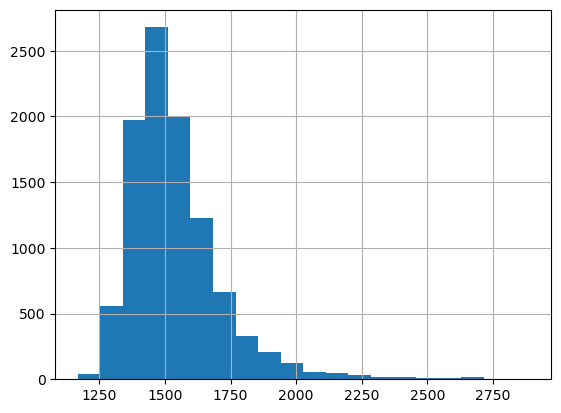

In [45]:
my_plotter.show_histogram(df["Rotational speed [rpm]"], 20)

<Axes: >

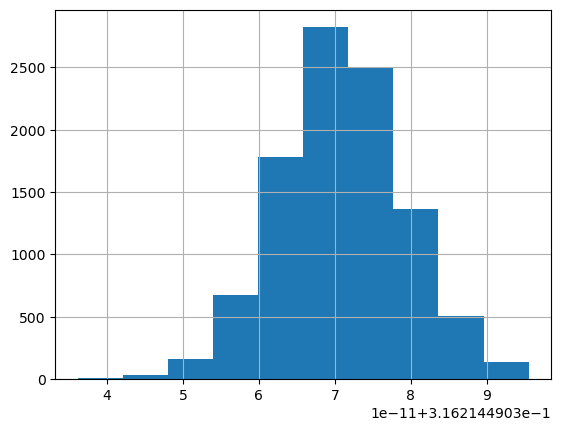

In [46]:
my_dataframe_transformer.apply_box_cox(df["Rotational speed [rpm]"]).hist()

In [47]:
df_transformed = df
df_transformed["Rotational speed [rpm]"] = my_dataframe_transformer.apply_box_cox(df["Rotational speed [rpm]"])

<Axes: >

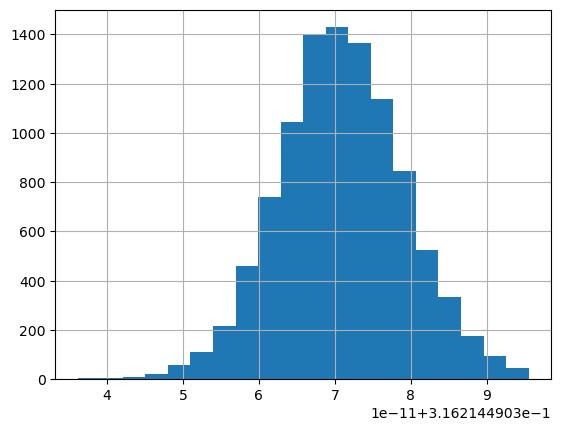

In [48]:
df_transformed["Rotational speed [rpm]"].hist(bins=20)

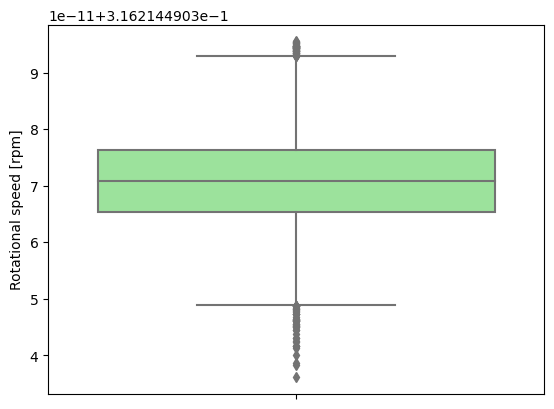

In [49]:
"""for column in df.columns[3:6]:
    if df[column].dtype in ['int64', 'float64']:
        my_plotter.show_box_plot(df[column])"""

my_plotter.show_box_plot(df_transformed["Rotational speed [rpm]"])

In [50]:
# import seaborn as sns

# sns.pairplot(df)

# Image of pairplot is found in 'pairplot.png'

In [51]:
for column in ["Type", "Air temperature [K]","Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]" ]:
    df[f"{column} z_scores"] = (df[column] - df[column].mean()) / df[column].std()

df.head()

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,...,RNF,Missing Air Temp,Missing Process Temp,Missing Tool Wear,Type z_scores,Air temperature [K] z_scores,Process temperature [K] z_scores,Rotational speed [rpm] z_scores,Torque [Nm] z_scores,Tool wear [min] z_scores
0,0,3416,L50595,0,301.4,310.4,0.316214,36.9,133.0,False,...,False,False,False,False,-0.745269,0.723072,0.269253,0.481080,-0.309653,0.399509
1,1,7130,L54309,0,300.6,310.0,0.316214,31.0,107.0,False,...,False,False,False,False,-0.745269,0.305036,-0.013702,0.787850,-0.901492,-0.019481
2,2,2320,M17179,1,299.2,308.8,0.316214,33.5,185.0,False,...,False,False,False,False,0.744376,-0.426528,-0.862568,1.093228,-0.650713,1.237491
3,3,9601,M24460,1,298.9,310.0,0.316214,45.3,58.0,False,...,False,False,False,False,0.744376,-0.583291,-0.013702,0.372539,0.532965,-0.809118
4,4,614,L47793,0,298.1,309.9,0.316214,30.0,53.0,False,...,False,False,False,False,-0.745269,-1.001327,-0.084441,0.782750,-1.001803,-0.889693


In [60]:
for column in ["Type", "Air temperature [K]","Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]" ]:
    df_transformed = df_transformed = df_transformed[abs(df_transformed[f"{column} z_scores"]) < 3]

df_transformed.head(10)

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,...,RNF,Missing Air Temp,Missing Process Temp,Missing Tool Wear,Type z_scores,Air temperature [K] z_scores,Process temperature [K] z_scores,Rotational speed [rpm] z_scores,Torque [Nm] z_scores,Tool wear [min] z_scores
0,0,3416,L50595,0,301.4,310.4,0.316214,36.9,133.0,False,...,False,False,False,False,-0.745269,0.723072,0.269253,0.481080,-0.309653,0.399509
1,1,7130,L54309,0,300.6,310.0,0.316214,31.0,107.0,False,...,False,False,False,False,-0.745269,0.305036,-0.013702,0.787850,-0.901492,-0.019481
2,2,2320,M17179,1,299.2,308.8,0.316214,33.5,185.0,False,...,False,False,False,False,0.744376,-0.426528,-0.862568,1.093228,-0.650713,1.237491
3,3,9601,M24460,1,298.9,310.0,0.316214,45.3,58.0,False,...,False,False,False,False,0.744376,-0.583291,-0.013702,0.372539,0.532965,-0.809118
4,4,614,L47793,0,298.1,309.9,0.316214,30.0,53.0,False,...,False,False,False,False,-0.745269,-1.001327,-0.084441,0.782750,-1.001803,-0.889693
5,5,4602,M19461,1,303.0,311.1,0.316214,54.3,117.0,True,...,False,False,False,False,0.744376,1.559144,0.764425,-1.163748,1.435769,0.141669
6,6,5247,L52426,0,300.1,310.1,0.316214,41.0,56.0,False,...,False,True,True,False,-0.745269,0.043763,0.057037,-0.305023,0.101625,-0.841348
7,7,7008,L54187,0,300.5,310.6,0.316214,45.2,8.0,False,...,False,False,False,False,-0.745269,0.252781,0.410731,-0.044276,0.522934,-1.614869
8,8,9375,M24234,1,297.8,308.5,0.316214,44.7,88.0,False,...,False,False,False,False,0.744376,-1.158091,-1.074785,-0.296994,0.472778,-0.325667
9,9,1962,L49141,0,297.8,310.1,0.316214,51.2,107.0,False,...,False,False,True,False,-0.745269,-1.158091,0.057037,-0.445115,1.124803,-0.019481


In [61]:
df_transformed["Power Output"] = df_transformed["Rotational speed [rpm]"] * df_transformed["Torque [Nm]"]

df_transformed.head()

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,...,Missing Air Temp,Missing Process Temp,Missing Tool Wear,Type z_scores,Air temperature [K] z_scores,Process temperature [K] z_scores,Rotational speed [rpm] z_scores,Torque [Nm] z_scores,Tool wear [min] z_scores,Power Output
0,0,3416,L50595,0,301.4,310.4,0.316214,36.9,133.0,False,...,False,False,False,-0.745269,0.723072,0.269253,0.481080,-0.309653,0.399509,11.668315
1,1,7130,L54309,0,300.6,310.0,0.316214,31.0,107.0,False,...,False,False,False,-0.745269,0.305036,-0.013702,0.787850,-0.901492,-0.019481,9.802649
2,2,2320,M17179,1,299.2,308.8,0.316214,33.5,185.0,False,...,False,False,False,0.744376,-0.426528,-0.862568,1.093228,-0.650713,1.237491,10.593185
3,3,9601,M24460,1,298.9,310.0,0.316214,45.3,58.0,False,...,False,False,False,0.744376,-0.583291,-0.013702,0.372539,0.532965,-0.809118,14.324516
4,4,614,L47793,0,298.1,309.9,0.316214,30.0,53.0,False,...,False,False,False,-0.745269,-1.001327,-0.084441,0.782750,-1.001803,-0.889693,9.486435


In [74]:
list_of_z_scores = [column for column in df.columns if "z_scores" in column]

df_transformed = df_transformed.drop(columns=list_of_z_scores)

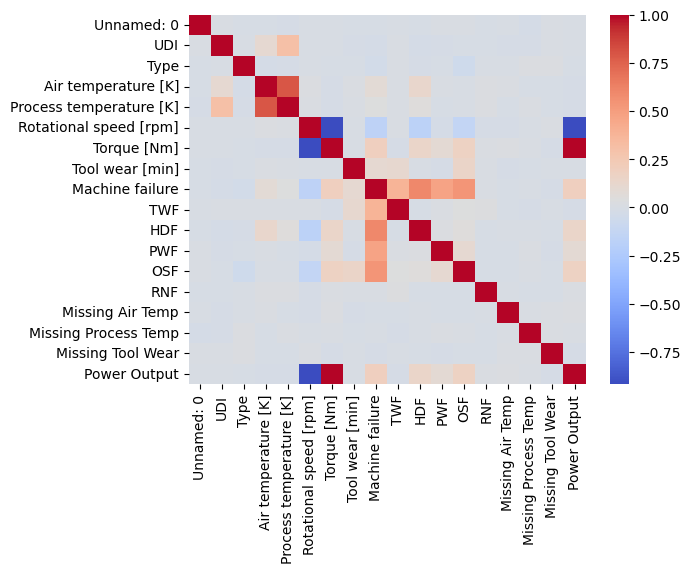

In [75]:
my_plotter.show_correlation_plot(df_transformed)

Only **Rotational speed [rpm]** and **Torque [Nm]** seem to be correlated, but if we look at a scatter plot: